In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from scipy.fft import fft,fftfreq
import scipy

In [2]:
hbar = 1 *1e-34

def print_section():
    print("---------------------------------------------------------------------------------------------------------------------")
    return None
random.seed(42069) #Seed for reproducibility
T = 10 * 1e-3
kb = 1.38*1e-23
kappa = 0.248;
z0 = 3/4*2.7*1e-3;
r0 = 3/4*3.5*1e-3;
a1 = -0.0008;
q1 = 0.15;#0.21801801801801804
omega_RF = 2*np.pi*5.2*1e6;
m1 = 135*1.66*(10**(-27))
m2 = 9000*1.66*(10**(-27))
Q1 = 1*1.6*1e-19;
Q2 = 24*1.6*1e-19;
omega_z1 = omega_RF*np.sqrt(-a1/2)
omega_r1 = omega_RF/2*np.sqrt(q1**2/2+a1)
V_DC = -a1*m1*(3/4*2.7*1e-3)**2*omega_RF**2/(4*Q1*0.248)
V_RF = q1/(2*Q1)*(m1*r0**2*omega_RF**2)
c = 3*1e8
lambd = c/(607.426262*1e12)
alpha = 0.1 #0.5 for radial degeneracy
waist = 500*1e-6
epsilon0 = 8.85*1e-12

amu = 1.66*(10**(-27))

Gamma = 2*np.pi*15.2*1e6
detuning = -Gamma/2
k = 2*np.pi/lambd*np.array([1/2,1/2,1/np.sqrt(2)])
saturation = 0.1


rho = Q2/Q1
mu = m2/m1

a2 = rho/mu * a1
q2 = rho/mu * q1

omega_z2 = omega_RF*np.sqrt(-a2/2)

omega_pond_1 = Q1*V_RF/(np.sqrt(2)*omega_RF*m1*r0**2)
omega_x1 = np.sqrt(omega_pond_1**2 - alpha*omega_z1**2)
omega_y1 = np.sqrt(omega_pond_1**2-(1-alpha)*omega_z1**2)

omega_pond2 = Q2*V_RF/(np.sqrt(2)*omega_RF*m2*r0**2)
omega_x2 = np.sqrt(omega_pond2**2-alpha*omega_z2**2)
omega_y2 = np.sqrt(omega_pond2**2-(1-alpha)*omega_z2**2)

zeq1 = np.cbrt(Q1*Q2/(4*np.pi*epsilon0*m1*omega_z1**2)*(1/(1+1/rho)**2))
zeq2 = -1/rho * zeq1
V_tickle = 0.5*V_DC
print_section()
print("DC Voltage: ",V_DC)
print("RF Voltage: ", V_RF )
print("Tickle Voltage: ", V_tickle)
print_section()
print("Equilibrium positions (µm): " , "z1 = ", zeq1 * 1e6, "    z2 = " ,zeq2 * 1e6)

---------------------------------------------------------------------------------------------------------------------
DC Voltage:  4.944434952348701
RF Voltage:  772.6951329853573
Tickle Voltage:  2.4722174761743503
---------------------------------------------------------------------------------------------------------------------
Equilibrium positions (µm):  z1 =  37.611797467191465     z2 =  -1.5671582277996443


In [3]:
deltaZ = zeq1-zeq2
K11 = omega_z1**2 + Q1*Q2/(4*np.pi*epsilon0*m1) * (2/deltaZ**3)
K12 = -Q1*Q2/(4*np.pi*epsilon0*np.sqrt(m1*m2)) * (2/deltaZ**3)
K22 = omega_z2**2 + Q1*Q2/(4*np.pi*epsilon0*m2) * (2/deltaZ**3)

K33 = omega_x1**2 - Q1*Q2/(4*np.pi*epsilon0*m1) * (1/deltaZ**3)
K34 = -0.5*K12
K44 = omega_x2**2 - Q1*Q2/(4*np.pi*epsilon0*m2) * (1/deltaZ**3)

K55 = omega_y1**2 - Q1*Q2/(4*np.pi*epsilon0*m1) * (1/deltaZ**3)
K56 = K34
K66 = omega_y2**2 - Q1*Q2/(4*np.pi*epsilon0*m2) * (1/deltaZ**3)

KZ = np.array([[K11,K12],[K12,K22]])
KY = np.array([[K33,K34],[K34,K44]])
KX = np.array([[K55,K56],[K56,K66]])


z_freqs, z_vecs = LA.eig(KZ)
y_freqs, y_vecs = LA.eig(KY)
x_freqs, x_vecs = LA.eig(KX)

z_freqs = np.sqrt(z_freqs)
y_freqs = np.sqrt(y_freqs)
x_freqs = np.sqrt(x_freqs)

print_section()
print("z frequencies are (kHz) : ", (z_freqs[0])/(2*np.pi*1e3),"     ", (z_freqs[1])/(2*np.pi*1e3))
print("z eigenvectors are: ", z_vecs[:,0], "        ", z_vecs[:,1])
print_section()
print("x frequencies are (kHz) : ", (x_freqs[0])/(2*np.pi*1e3),"     ", (x_freqs[1])/(1*np.pi*1e3))
print("x eigenvectors are: ", x_vecs[:,0], "        ", x_vecs[:,1])
print_section()
print("y frequencies are (kHz) : ", (y_freqs[0])/(2*np.pi*1e3),"     ", (y_freqs[1])/(1*np.pi*1e3))
print("y eigenvectors are: ", y_vecs[:,0], "        ", y_vecs[:,1])
print_section()
if np.sign(z_vecs[0,0]) == np.sign(z_vecs[1,0]):
    z_in_mode = z_vecs[:,0]
    z_out_mode = z_vecs[:,1]
else:
    z_in_mode = z_vecs[:,1]
    z_out_mode = z_vecs[:,0]

if np.sign(x_vecs[0,0]) == np.sign(x_vecs[1,0]):
    x_in_mode = x_vecs[:,0]
    x_out_mode = x_vecs[:,1]
else:
    x_in_mode = x_vecs[:,1]
    x_out_mode = x_vecs[:,0]

if np.sign(y_vecs[0,0]) == np.sign(y_vecs[1,0]):
    y_in_mode = y_vecs[:,0]
    y_out_mode = y_vecs[:,1]
else:
    y_in_mode = y_vecs[:,1]
    y_out_mode = y_vecs[:,0]


#Remember to include z-tickle in radial direction as well.

---------------------------------------------------------------------------------------------------------------------
z frequencies are (kHz) :  178.3732014101675       63.01572675680125
z eigenvectors are:  [ 0.99578443 -0.09172445]          [0.09172445 0.99578443]
---------------------------------------------------------------------------------------------------------------------
x frequencies are (kHz) :  236.56866764492193       157.01529974759086
x eigenvectors are:  [0.99967371 0.02554375]          [-0.02554375  0.99967371]
---------------------------------------------------------------------------------------------------------------------
y frequencies are (kHz) :  254.1933960356908       192.6832739169896
y eigenvectors are:  [0.99973572 0.02298886]          [-0.02298886  0.99973572]
---------------------------------------------------------------------------------------------------------------------


Above is all just the settings for the run. We now write some Verlet integration for the 2-ion problem

In [4]:
x1_init = 1e-5*x_in_mode[0]/np.sqrt(m1/amu)+1e-5*x_out_mode[0]/np.sqrt(m1/amu)
x2_init = 1e-5*x_in_mode[1]/np.sqrt(m2/amu)+1e-5*x_out_mode[1]/np.sqrt(m2/amu)


y1_init = 1e-5*y_in_mode[0]/np.sqrt(m1/amu)+1e-5*y_out_mode[0]/np.sqrt(m1/amu)
y2_init = 1e-5*y_in_mode[1]/np.sqrt(m2/amu)+1e-5*y_out_mode[1]/np.sqrt(m2/amu)

z1_init = zeq1+1e-5*z_in_mode[0]/np.sqrt(m1/amu)+1e-5*z_out_mode[0]/(np.sqrt(m1/amu))
z2_init = zeq2+1e-5*z_in_mode[1]/np.sqrt(m2/amu)+1e-5*z_out_mode[1]/(np.sqrt(m2/amu))

r1_init = np.array([x1_init,y1_init,z1_init])
r2_init = np.array([x2_init,y2_init,z2_init])

v1_init = np.zeros(3)
v2_init = np.zeros(3)

t_init = 0
t_end = 1*1e-4

dt = 2*np.pi/(omega_RF)/360

t = 0
ts = []
positions = []
velocities = []
print("Initial Time: ", t_init)
print("End Time: ", t_end)
print("Time Step: ", dt)
print("Total number of steps: ",int(np.floor(t_end/dt)))
print_section()
print("Initial position 1 (µm): ", r1_init*1e6)
print("Initial velcoity 1 (m/s): ", v1_init)

print("Initial position 2 (µm): ", r2_init*1e6)
print("Initial velcoity 2 (m/s): ", v2_init)

print_section()
print("Secular z-direction Barium Frequency (kHz):  ", omega_z1/(2*np.pi*1e3))
print("Secular x-direction Barium Frequency (kHz):  ", omega_y1/(2*np.pi*1e3))
print("Secular y-direction Barium Frequency (kHz):  ", omega_x1/(2*np.pi*1e3))
print_section()
print_section()
print("z frequencies are (kHz) : ", (z_freqs[0])/(2*np.pi*1e3),"     ", (z_freqs[1])/(2*np.pi*1e3))
print("z eigenvectors are: ", z_vecs[:,0], "        ", z_vecs[:,1])
print_section()
print("x frequencies are (kHz) : ", (x_freqs[0])/(2*np.pi*1e3),"     ", (x_freqs[1])/(1*np.pi*1e3))
print("x eigenvectors are: ", x_vecs[:,0], "        ", x_vecs[:,1])
print_section()
print("y frequencies are (kHz) : ", (y_freqs[0])/(2*np.pi*1e3),"     ", (y_freqs[1])/(1*np.pi*1e3))
print("y eigenvectors are: ", y_vecs[:,0], "        ", y_vecs[:,1])
print_section()
print('Equilibrium displacements for ion 1 are (µm): ',(np.array([0,0,zeq1])-r1_init)*1e6)
print('Equilibrium displacements for ion 2 are (µm): ',(np.array([0,0,zeq2])-r2_init)*1e6)

print_section()


def TrapForce(q,r,V_DC,V_RF,alpha,t):
    #r is 3d vector (x,y,z)
    z = r[2]
    x = r[0]
    y = r[1]
    Fz = -q*2*kappa*V_DC/(z0**2) * z
    Fy = q*(2*(1-alpha)*kappa*V_DC/(z0**2) *y -V_RF/(r0**2)*y*np.cos(omega_RF*t))
    Fx = q*(2*alpha*kappa*V_DC/(z0**2) *x +V_RF/(r0**2)*x*np.cos(omega_RF*t))
    return  np.array([Fx,Fy,Fz])


def CoulombForce(q1,q2,r1,r2):
    return q1*q2/(4*np.pi*epsilon0)*(r1-r2)/LA.norm(r1-r2)**3


Initial Time:  0
End Time:  0.0001
Time Step:  5.341880341880342e-10
Total number of steps:  187200
---------------------------------------------------------------------------------------------------------------------
Initial position 1 (µm):  [ 0.83839757  0.84064985 38.54777608]
Initial velcoity 1 (m/s):  [0. 0. 0.]
Initial position 2 (µm):  [ 0.10806741  0.10780464 -1.47186194]
Initial velcoity 2 (m/s):  [0. 0. 0.]
---------------------------------------------------------------------------------------------------------------------
Secular z-direction Barium Frequency (kHz):   104.00000000000001
Secular x-direction Barium Frequency (kHz):   257.51815469981915
Secular y-direction Barium Frequency (kHz):   273.80357923153593
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
z frequencies are (kHz) :  17

In [5]:
current_pos1 = r1_init
current_vel1 = v1_init

current_pos2 = r2_init
current_vel2 = v2_init




counter = 0
pos1s = []
pos2s = []
vel1s = []
vel2s = []
ts = []

while t < t_end:
    next_t = t+dt
    Fcoul = CoulombForce(Q1,Q2,current_pos1,current_pos2)
    current_force1 = TrapForce(Q1,current_pos1,V_DC,V_RF,alpha,t) + Fcoul
    current_force2 = TrapForce(Q2,current_pos2,V_DC,V_RF,alpha,t) - Fcoul


    next_pos1 = current_pos1 + current_vel1*dt + 1/(2*m1)*(current_force1) * dt**2
    next_pos2 = current_pos2 + current_vel2*dt + 1/(2*m2)*(current_force2) * dt**2

    next_fcoul = CoulombForce(Q1,Q2,next_pos1,next_pos2)

    next_force1 = TrapForce(Q1,next_pos1,V_DC,V_RF,alpha,next_t) + next_fcoul
    next_force2 = TrapForce(Q2,next_pos2,V_DC,V_RF,alpha,next_t) - next_fcoul

    next_vel1 = current_vel1 + 1/(2*m1)*(current_force1 + next_force1) *dt
    next_vel2 = current_vel2 + 1/(2*m2)*(current_force2 + next_force2) *dt




    if np.mod(counter,500) == 0:
        pos1s.append(current_pos1)
        pos2s.append(current_pos2)

        vel1s.append(current_vel1)
        vel2s.append(current_vel2)
        #print(Fcoul,current_force1-Fcoul)
        ts.append(t)
    t+=dt
    current_pos1 = next_pos1
    current_vel1 = next_vel1
    current_pos2 = next_pos2
    current_vel2 = next_vel2


Text(0.5, 0, 'Time (ms)')

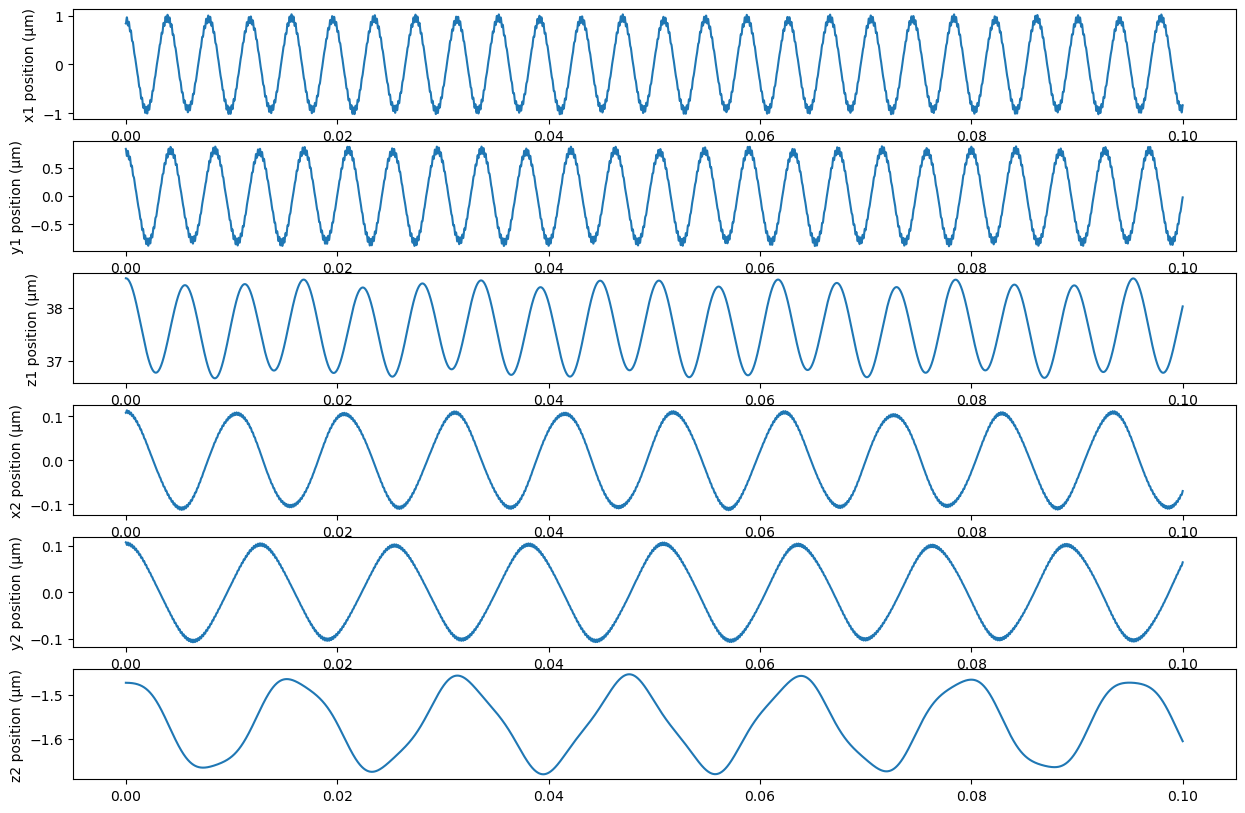

In [6]:
fig,ax = plt.subplots(6,1,figsize = (15,10))
z1s = []
y1s = []
x1s = []


x2s = []
y2s = []
z2s = []
for position in pos1s:
    z1s.append(position[2])
    y1s.append(position[1])
    x1s.append(position[0])

for position in pos2s:
    z2s.append(position[2])
    y2s.append(position[1])
    x2s.append(position[0])
x1s = np.array(x1s)
x2s = np.array(x2s)
y1s = np.array(y1s)
y2s = np.array(y2s)
z1s = np.array(z1s)
z2s = np.array(z2s)


ax[0].plot(np.array(ts)*1e3,x1s*1e6)
ax[1].plot(np.array(ts)*1e3,y1s*1e6)
ax[2].plot(np.array(ts)*1e3,z1s*1e6)



ax[3].plot(np.array(ts)*1e3,x2s*1e6)
ax[4].plot(np.array(ts)*1e3,y2s*1e6)
ax[5].plot(np.array(ts)*1e3,z2s*1e6)

ax[0].set_ylabel('x1 position (µm)')
ax[1].set_ylabel('y1 position (µm)')
ax[2].set_ylabel('z1 position (µm)')
ax[3].set_ylabel('x2 position (µm)')
ax[4].set_ylabel('y2 position (µm)')
ax[5].set_ylabel('z2 position (µm)')



ax[2].set_xlabel('Time (ms)')

Now that we have some arbitrary movement. Let's see if we can break it into the two eigenmodes of the motion! We start by looking at mass-weighted equilibrium displacement instead of full position.

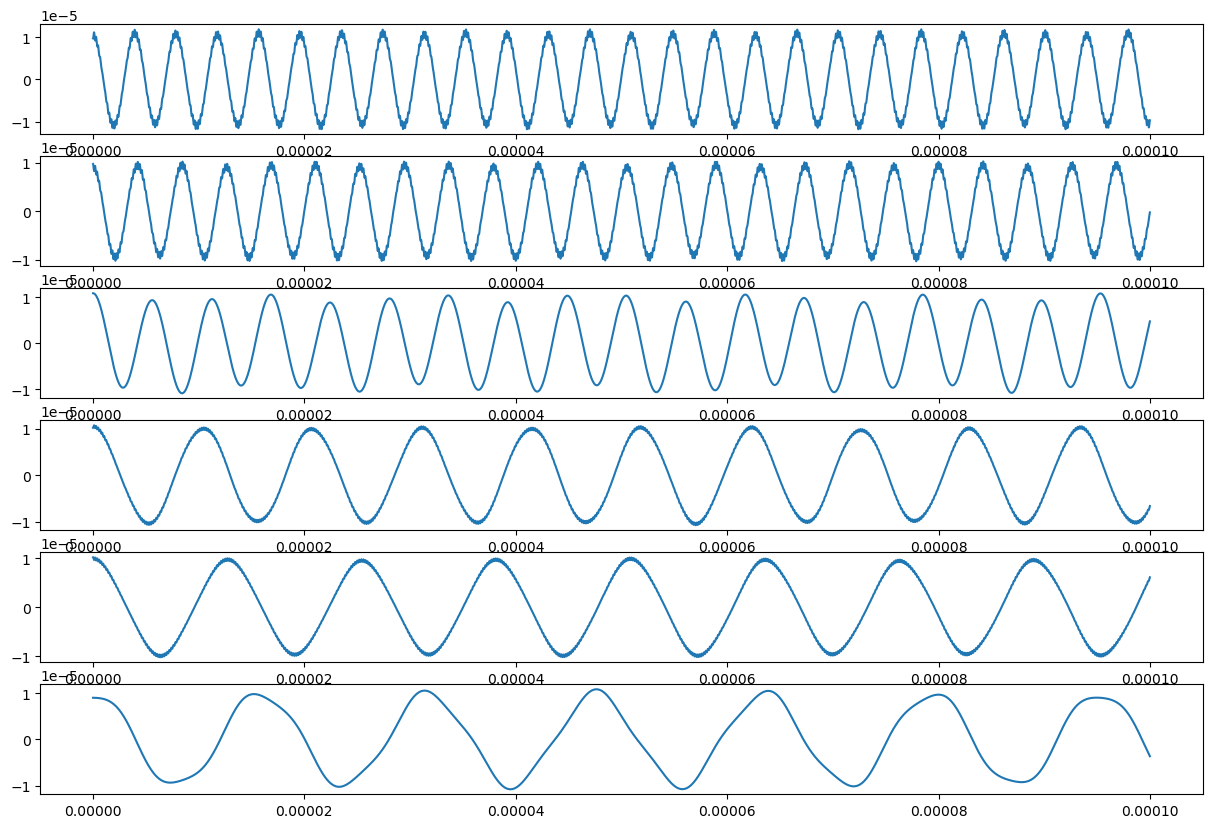

In [7]:
weighted_displacements1 = []
weighted_displacements2 = []

weighted_displacements_x1 = []
weighted_displacements_y1 = []
weighted_displacements_z1 = []

weighted_displacements_x2 = []
weighted_displacements_y2 = []
weighted_displacements_z2 = []

for position1 ,position2 in zip(pos1s,pos2s):
    weighted_displace_z1 = (position1[2]-zeq1)*np.sqrt(m1/amu)
    weighted_displace_y1 = position1[1]*np.sqrt(m1/amu)
    weighted_displace_x1 = position1[0]*np.sqrt(m1/amu)

    weighted_displacements_x1.append(weighted_displace_x1)
    weighted_displacements_y1.append(weighted_displace_y1)
    weighted_displacements_z1.append(weighted_displace_z1)
    weighted_displacements1.append(np.array([weighted_displace_x1,weighted_displace_y1,weighted_displace_z1]))
    
    weighted_displace_x2 = (position2[0])*np.sqrt(m2/amu)
    weighted_displace_y2 = position2[1]*np.sqrt(m2/amu)
    weighted_displace_z2 = (position2[2]-zeq2)*np.sqrt(m2/amu)

    weighted_displacements_x2.append(weighted_displace_x2)
    weighted_displacements_y2.append(weighted_displace_y2)
    weighted_displacements_z2.append(weighted_displace_z2)
    weighted_displacements2.append(np.array([weighted_displace_x2,weighted_displace_y2,weighted_displace_z2]))

fig,ax = plt.subplots(6,1,figsize = (15,10))
ax[0].plot(ts,weighted_displacements_x1)
ax[1].plot(ts,weighted_displacements_y1)
ax[2].plot(ts,weighted_displacements_z1)
ax[3].plot(ts,weighted_displacements_x2)
ax[4].plot(ts,weighted_displacements_y2)
ax[5].plot(ts,weighted_displacements_z2)

With the mass-weighted coordinates in place. We are ready to look at projections!

Text(0, 0.5, 'x - in phase\nprojection')

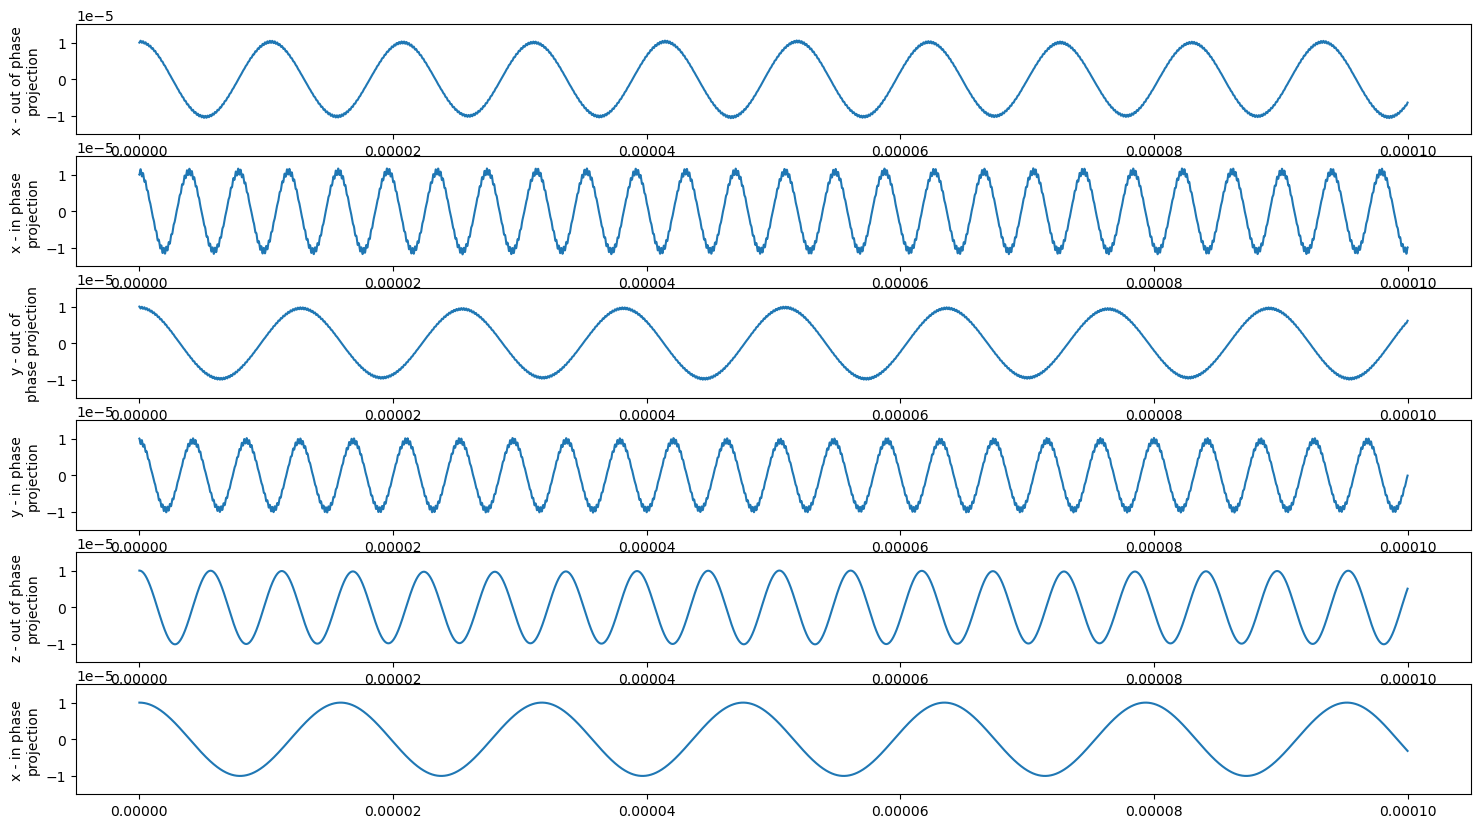

In [8]:
dot_z_out = [np.dot(np.array([z1,z2]),z_out_mode) for z1,z2 in zip(weighted_displacements_z1,weighted_displacements_z2)]
dot_z_in = [np.dot(np.array([z1,z2]),z_in_mode) for z1,z2 in zip(weighted_displacements_z1,weighted_displacements_z2)]

dot_x_in = [np.dot(np.array([x1,x2]),x_in_mode) for x1,x2 in zip(weighted_displacements_x1,weighted_displacements_x2)]
dot_x_out = [np.dot(np.array([x1,x2]),x_out_mode) for x1,x2 in zip(weighted_displacements_x1,weighted_displacements_x2)]

dot_y_in = [np.dot(np.array([y1,y2]),y_in_mode) for y1,y2 in zip(weighted_displacements_y1,weighted_displacements_y2)]
dot_y_out = [np.dot(np.array([y1,y2]),y_out_mode) for y1,y2 in zip(weighted_displacements_y1,weighted_displacements_y2)]


fig,ax = plt.subplots(6,1,figsize = (18,10))
ax[0].plot(ts,dot_x_out)
ax[1].plot(ts,dot_x_in)
ax[2].plot(ts,dot_y_out)
ax[3].plot(ts,dot_y_in)
ax[4].plot(ts,dot_z_out)
ax[5].plot(ts,dot_z_in)

for j in range(6):
    ax[j].set_ylim(1.5*(-1e-5),1.5*1e-5)


ax[0].set_ylabel('x - out of phase\nprojection')
ax[1].set_ylabel('x - in phase\nprojection')
ax[2].set_ylabel('y - out of\nphase projection')
ax[3].set_ylabel('y - in phase\nprojection')
ax[4].set_ylabel('z - out of phase\nprojection')
ax[5].set_ylabel('x - in phase\nprojection')

Very nice! We are clearly able to disassemble the motion into these eigenstates. What's even nicer is that we are clearly able to see micromotion even in the projections when these go away from their equilibria!

In [ ]:
#Skeleton of cooler code

# if current_state == 0:
#         B12 = saturation*Gamma*0.5/(1+4*(detuning-np.dot(k,current_vel))**2/(Gamma**2))
#         rnd_nr = np.random.rand()
#         if rnd_nr < B12*dt: #Absorption
#             next_vel += hbar*k/m1
#             current_state = 1
#     elif current_state ==1: #Technically this oculd just be else, but the elif is nice if we want to expand to more than two levels
#         rnd_nr = np.random.rand()
#         B12 = saturation*Gamma*0.5/(1+4*(detuning-np.dot(k,current_vel))**2/(Gamma**2))
        
#         if rnd_nr < Gamma* dt: #Spontaneous emission
#             next_vel += hbar/m1*k_norm*random_direction()
#             current_state = 0
#         elif rnd_nr < (B12+Gamma)*dt: #Stimulated emission
#             next_vel -= hbar/m1*k
#             current_state = 0


def random_direction():
    u,v = np.random.rand(2)
    phi = 2*np.pi*u
    theta = np.arccos(1-2*v)
    return np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])

k_norm = LA.norm(k)

current_pos1 = r1_init
current_vel1 = v1_init

current_pos2 = r2_init
current_vel2 = v2_init




counter = 0
pos1s = []
pos2s = []
vel1s = []
vel2s = []
ts = []
current_state = 0


while t < t_end:
    next_t = t+dt
    Fcoul = CoulombForce(Q1,Q2,current_pos1,current_pos2)
    current_force1 = TrapForce(Q1,current_pos1,V_DC,V_RF,alpha,t) + Fcoul
    current_force2 = TrapForce(Q2,current_pos2,V_DC,V_RF,alpha,t) - Fcoul


    next_pos1 = current_pos1 + current_vel1*dt + 1/(2*m1)*(current_force1) * dt**2
    next_pos2 = current_pos2 + current_vel2*dt + 1/(2*m2)*(current_force2) * dt**2

    next_fcoul = CoulombForce(Q1,Q2,next_pos1,next_pos2)

    next_force1 = TrapForce(Q1,next_pos1,V_DC,V_RF,alpha,next_t) + next_fcoul
    next_force2 = TrapForce(Q2,next_pos2,V_DC,V_RF,alpha,next_t) - next_fcoul

    next_vel1 = current_vel1 + 1/(2*m1)*(current_force1 + next_force1) *dt
    next_vel2 = current_vel2 + 1/(2*m2)*(current_force2 + next_force2) *dt


    if current_state == 0:
        B12 = saturation*Gamma*0.5/(1+4*(detuning-np.dot(k,current_vel1))**2/(Gamma**2))
        rnd_nr = np.random.rand()
        if rnd_nr<B12*dt: #Absorb
            next_vel1 +=hbar*k/m1
            current_state =1
    elif current_state ==1:
        B12 = saturation*Gamma*0.5/(1+4*(detuning-np.dot(k,current_vel1))**2/(Gamma**2))
        rnd_nr = np.random.rand()
        if rnd_nr < Gamma*dt:# spont emiss
            next_vel1 += hbar/m1*k_norm*random_direction()
            current_state = 0
        elif rnd_nr < (Gamma+B12)*dt: #Stim emiss
            next_vel1 -=hbar*k/m1
            current_state = 0


    if np.mod(counter,500) == 0:
        pos1s.append(current_pos1)
        pos2s.append(current_pos2)

        vel1s.append(current_vel1)
        vel2s.append(current_vel2)
        #print(Fcoul,current_force1-Fcoul)
        ts.append(t)
    t+=dt
    current_pos1 = next_pos1
    current_vel1 = next_vel1
    current_pos2 = next_pos2
    current_vel2 = next_vel2
